# Unit 2: Elementary Signals

The preparatory reading for this section is [Chapter 1](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=75#ppg=17) of {cite}`karris` which

* begins with a discussion of the elementary signals that may be applied to electrical circuits
* introduces the unit step, unit ramp and dirac delta functions
* presents the sampling and sifting properties of the delta function and
* concludes with examples of how other useful signals can be synthesised from these elementary signals.

## Colophon

An annotatable worksheet for this presentation is available as [**Worksheet 3**](/elementary_signals/worksheet3).

* The source code for this page is [elementary_signals/index.md](https://github.com/cpjobling/eg-247-textbook/blob/master/elementary_signals/index.md).

* You can view the notes for this presentation as a webpage ([HTML](https://cpjobling.github.io/eg-247-textbook/elementary_signals/index.html)). 

* This page is downloadable as a [PDF](https://cpjobling.github.io/eg-247-textbook/elementary_signals/elementary_signals.pdf) file.

Consider the network shown in below where the switch is closed at time $t=T$ and all components are ideal. 

![Network with a switch which is closed at t = T.](./pictures/circuit2.png)

Express the output voltage $V_{\mathrm{out}}$ as a function of the unit step function, and sketch the appropriate waveform.

**Solution**

Before the switch is closed at $t < T$:

$$V_{\mathrm{out}} = 0.$$

After the switch is closed for $t > T$: 

$$V_{\mathrm{out}} = V_s.$$

We imagine that the voltage jumps instantaneously from 0 to $V_s$ volts at $t = T$ seconds as shown below.

<img src="./pictures/step.png" width = "30%"  alt="The step function" />

We call this type of signal a step function.

## The Unit Step Function

$${u_0}(t) = \left\{ {\begin{array}{*{20}{c}}
{0\quad t < 0}\\
{1\quad t > 0}
\end{array}} \right.$$

![The unit step function](./pictures/unitstep.png)

### In Matlab

In Matlab, we use the `heaviside` function (named after [Oliver Heaviside](https://en.wikipedia.org/wiki/Oliver_Heaviside)).

%%file plot_heaviside.m
syms t
ezplot(heaviside(t),[-1,1])
heaviside(0)

In [1]:
%%file plot_heaviside.m 
syms t 
fplot(heaviside(t),[-1,1]),ylim([-0.2,1.2])
grid
heaviside(0)

Created file '/Users/eechris/code/src/github.com/cpjobling/eg-247-textbook/elementary_signals/plot_heaviside.m'.



ans =

    0.5000



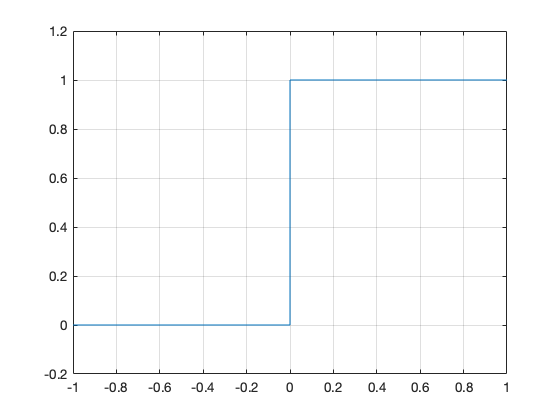

In [2]:
plot_heaviside

Note that, so that it can be plotted, Matlab defines the *heaviside function* slightly differently from the mathematically ideal unit step:

$$\mathrm{heaviside}(t) = \left\{ {\begin{array}{*{20}{c}}
{0\quad t < 0}\\
{1/2\quad t = 0}\\
{1\quad t > 0}
\end{array}} \right.$$

## Simple Signal Operations

### Amplitude Scaling

Sketch $Au_0(t)$ and $-Au_0(t)$

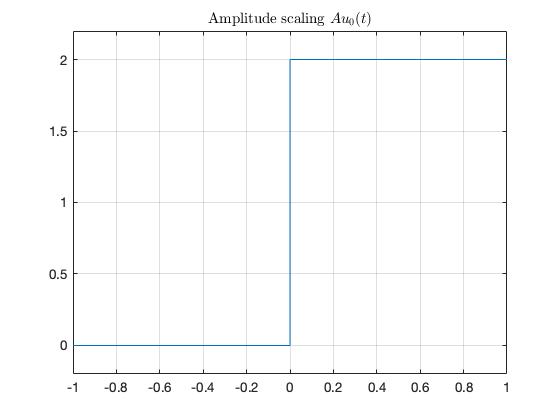

In [3]:
syms t;
u0(t) = heaviside(t); % rename heaviside function for ease of use
A = 2; % so signal can be plotted
fplot(A*u0(t),[-1,1]),ylim([-0.2,2.2]),grid,title('Amplitude scaling $$Au_0(t)$$','interpreter','latex')

Note that the signal is scaled in the $y$ direction.

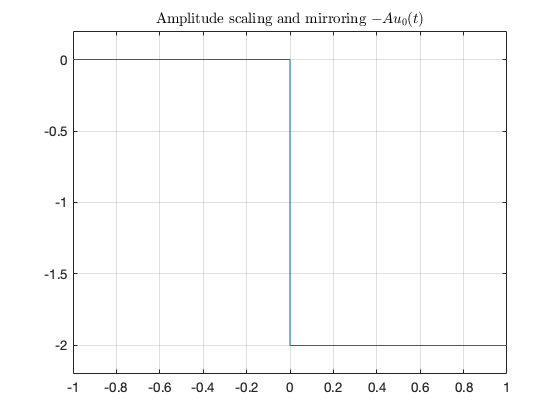

In [4]:
fplot(-A*u0(t),[-1,1]),grid,ylim([-2.2,0.2]),title('Amplitude scaling and mirroring $$-Au_0(t)$$','interpreter','latex')

Note that, because of the sign, the signal is mirrored about the $x$ axis as well as being scaled by 2.

### Time Reversal

Sketch $u_0(-t)$

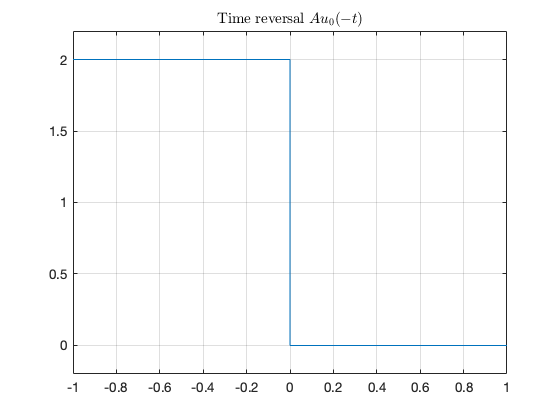

In [5]:
fplot(A*u0(-t),[-1,1]),ylim([-0.2,2.2]),grid,title('Time reversal $$Au_0(-t)$$','interpreter','latex')

The sign on the function argument $-t$ causes the whole signal to be reversed in time. Note that another way of looking at this is that the signal is mirrored about the $y$ axis.

### Time Delay and Advance

Sketch $u_0(t-T)$ and $u_0(t+T)$

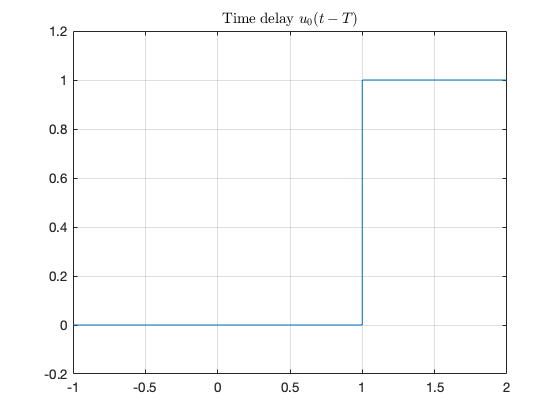

In [6]:
T = 1; % again to make the signal plottable.
fplot(u0(t - T),[-1,2]),ylim([-0.2,1.2]),grid,title('Time delay $$u_0(t - T)$$','interpreter','latex')

This is a *time delay* ... note for $u_0(t - T)$ the step change occurs T seconds **later** than it does for $u_o(t)$.

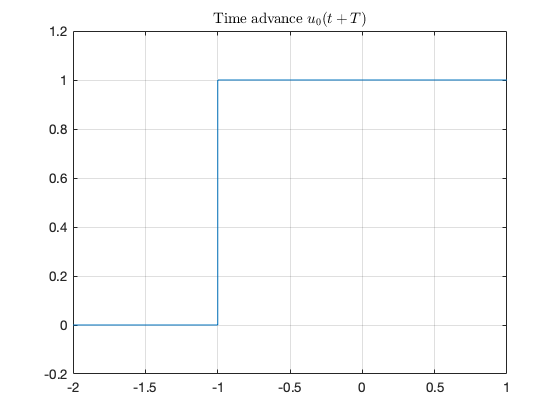

In [7]:
fplot(u0(t + T),[-2,1]),ylim([-0.2,1.2]),grid,title('Time advance $$u_0(t + T)$$','interpreter','latex')

This is a *time advance* ... note for $u_0(t + T)$ the step change occurs T seconds **earlier** than it does for $u_o(t)$.

### Examples

We will work through some examples in class. See [Worksheet 3](worksheet3).

## Synthesis of Signals from the Unit Step

Unit step functions can be used to represent other time-varying functions such as rectangular pulses, square waves and triangular pulses. See [Worksheet 3](worksheet3) for the examples that we will look at in class.

## The Ramp Function

![Integrator (RC) circuit](./pictures/rc.png)

In the circuit shown above $i_s$ is a constant current source and the switch is closed at time $t=0$.

When the current through the capacitor $i_c(t) = i_s$ is a constant and the voltage across the capacitor is

$$v_c(t) = \frac{1}{C}\int_{-\infty}^{t} i_c(\tau)\;d\tau$$ 

where $\tau$ is a dummy variable.

Since the switch closes at $t=0$, we can express the current $i_c(t)$ as

$$i_c(t) = i_s u_0(t)$$

and if $v_c(t) = 0$ for $t < 0$ we have

$$v_c(t) = \frac{i_s}{C}\int_{-\infty}^{t} u_0(\tau)\;d\tau = \underbrace { \frac{i_s}{C}\int_{ - \infty }^0 0\;{\kern 1pt} d\tau }_0 + \frac{i_s}{C}\int_{0}^{t} 1\;d\tau$$

So, the voltage across the capacitor can be represented as

$$v_C(t)=\frac{i_s}{C}t u_0(t)$$

**Note** that in this as in other examples throughout these notes, and in published tables of transforms, the inclusion of $u_0(t)$ in $v_c(t)$ acts as a "gating function" that limits the definition of the signal to the causal range $0 \le t \lt \infty$.

To sketch the wave form, let's arbitrarily let $C$ and $i_s$ be one and then plot with MATLAB.

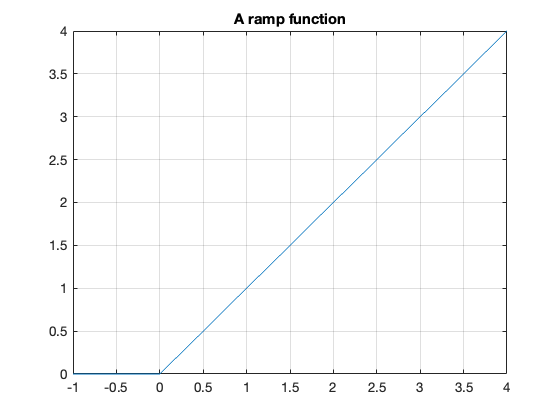

In [8]:
C = 1; is = 1;
vc(t)=(is/C)*t*u0(t);
fplot(vc(t),[-1,4]),grid,title('A ramp function')

This type of signal is called a **ramp function**. Note that it is the *integral* of the step function (the resistor-capacitor circuit implements a simple integrator circuit).

The unit ramp function is defined as

$$u_1(t) = \int_{-\infty}^{t}u_0(\tau)d\tau$$

so

$${u_1}(t) = \left\{ {\begin{array}{*{20}{c}}
{0\quad t < 0}\\
{t\quad t \ge 0}
\end{array}} \right.$$

and 

$$u_0(t) = \frac{d }{dt}u_1(t)$$

**Note**

Higher order functions of $t$ can be generated by the repeated integration of the unit step function. 

For future reference, you should determine $u_2(t)$, $u_3(t)$ and $u_n(t)$ for yourself and make a note of the general rule:

$$u_{n-1} = \frac{1}{n}\frac{d}{dt}u_n(t)$$

Details are given in equations 1.26&mdash;1.29 in Karris.

## The Dirac Delta Function

![A differentiating function (RL network)](./pictures/lr.png)

In the circuit shown above, the switch is closed at time $t=0$ and $i_L(t)=0$ for $t<0$. Express the inductor current $i_L(t)$ in terms of the unit step function and hence derive an expression for $v_L(t)$.

**Solution** 

$$v_L(t) = L\frac{di_L}{dt}$$

Because the switch closes instantaneously at $t=0$

$$i_L(t) = i_s u_0(t)$$

Thus 

$$v_L(t) = i_s L\frac{d}{dt} u_0(t).$$

To solve this problem we need to invent a function that represents the derivative of the unit step function. This function is called $\delta(t)$ or the *dirac delta* function (named after [Paul Dirac](https://en.wikipedia.org/wiki/Paul_Dirac)).

### The delta function

The unit impulse or the delta function, denoted as $\delta(t)$, is the derivative of the unit step.

This function is tricky because $u_0(t)$ is discontinuous at $t=0$ but it must have the properties

$$\int_{-\infty}^{t}\delta(\tau)d\tau = u_0(t)$$

and

$$\delta(t) = 0\;\forall\;
t\ne 0.$$

### Sketch of the delta function

![The delta function](pictures/impulse.png)

### MATLAB Confirmation

In [9]:
syms is L;
vL(t) = is * L * diff(u0(t))

vL(t) =
 


L*is*dirac(t)


Note that we can't plot dirac(t) in MATLAB with `ezplot`.

## Important properties of the delta function

### Sampling Property

The *sampling property* of the delta function states that

$$f(t)\delta(t-a) = f(a)\delta(t-a)$$

or, when $a = 0$,

$$f(t)\delta(t) = f(0)\delta(t)$$

Multiplication of any function $f(t)$ by the delta function $\delta(t)$ results in sampling the function at the time instants for which the delta function is not zero.

The study of descrete-time (sampled) systems is based on this property.

*You should work through the proof* for youself.

### Sifting Property

The *sifting property* of the delta function states that

$$\int_{-\infty}^{\infty}f(t)\delta(t-\alpha)dt=f(\alpha)$$

That is, if multiply any function $f(t)$ by $\delta(t-\alpha)$, and integrate from $-\infty$ to $+\infty$, we will get the value of $f(t)$ evaluated at $t=\alpha.$

*You should also work through the proof* for yourself.

### Higher Order Delta Fuctions

the n*th*-order *delta function* is defined as the n*th* derivative of $u_0(t)$, that is

$$\delta^n(t)=\frac{d^n}{dt^n}[u_0(t)]$$

The function $\delta'(t)$ is called the *doublet*, $\delta''(t)$ is called the *triplet* and so on.

By a procedure similar to the derivation of the sampling property we can show that

$$f(t)\delta'(t-a)=f(a)\delta'(t-a)-f'(t)\delta(t-a)$$

Also, derivation of the sifting property can be extended to show that

$$\int_{-\infty}^{\infty}f(t)\delta^n(t-\alpha)dt = \left. ( - 1)^n\frac{d^n}{dt^n}[f(t)] \right|_{t = \alpha }$$

## Summary

In this chapter we have looked at some elementary signals and the theoretical circuits that can be used to generate them.

### Takeaways

* You should note that the unit step is the *heaviside function* $u_0(t)$.
* Many useful signals can be synthesized by use of the unit step as a "gating function" in combination with other signals
* That unit ramp function $u_1(t)$ is the integral of the step function.
* The *Dirac delta* function $\delta(t)$ is the derivative of the unit step function. We sometimes refer to it as the *unit impulse function*.
* The delta function has sampling and sifting properties that will be useful in the development of *time convolution* and *sampling theory*.

### Examples

We will do some of these in class. See [Worksheet 3](worksheet3).

### Homework

These are for you to do later for further practice. See [Homework 1](../homework/hw1).

## References

See [Bibliography](/zbib)